## Data of the Day - Nov 21, 2017

One of my favorite resources is [data.world](https://data.world). We'll be exploring the datasets available on the platform here on an ongoing basis for fun and for practice.

**Today's Data**: [2017 Technology Fast 500 Ranking - The fastest growing technology companies in North America](https://data.world/jgrosch/deloitte-technology-fast-500-2017-north-america)

![chart](https://data.world/api/chart/export/c7b57fce24c1fbbe21050f3f70a653518bf97769f021eb2ffa814183dead3e1b.png)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('/home/datadavis/Downloads/us-tmt-fast500-2017-winners-ranking.xlsx') #reads 1st sheet by default

In [2]:
# lower column headers

df.columns = [column.lower() for column in df.columns]

# https://stackoverflow.com/questions/43459520/python-pandas-rename-multiple-column-headers-the-same-way

In [3]:
df.head(2)

rank      company name           primary industry   growth      city prov.  \
0       1     Donuts Inc.  Communications/networking  59,093%  Kirkland    WA   
1       2  ClassPass Inc.                   Software  46,556%  New York    NY   

       ceo name  
0   Bruce Jaffe  
1  Fritz Lanman

In [4]:
df.dtypes

rank                 int64
company name        object
primary industry    object
growth              object
city                object
prov.               object
ceo name            object
dtype: object

In [5]:
# need to fix growth percent column -- some are strings, some are ints

df['growth']

0      59,093%
1      46,556%
2      31,250%
3      31,242%
4      21,426%
5      16,981%
6      13,759%
7      13,638%
8      13,323%
9      13,057%
10     12,979%
11     12,800%
12     12,032%
13     12,029%
14     11,677%
15      113.68
16      9,763%
17      9,282%
18      9,114%
19      8,913%
20      8,542%
21      8,507%
22      7,987%
23      7,191%
24      7,146%
25      6,810%
26      6,535%
27      6,334%
28      6,251%
29      5,577%
        ...   
470       1.54
471       1.53
472       1.53
473       1.52
474       1.52
475       1.52
476       1.52
477       1.52
478       1.51
479       1.51
480        1.5
481        1.5
482       1.47
483       1.47
484       1.46
485       1.46
486       1.45
487       1.45
488       1.44
489       1.44
490       1.43
491       1.42
492       1.41
493       1.41
494        1.4
495       1.39
496       1.39
497       1.37
498       1.37
499       1.35
Name: growth, Length: 500, dtype: object

In [6]:
df['growth'][0][-1:]

'%'

In [7]:
growth_per = []

for g in df['growth']:
    try:
        if g[-1:] == '%':
            trim_len = len(g) - 1
            g_str = g[: trim_len] # remove percent sign
            g_str = g_str.replace(',', '') # remove comma

            growth_per.append(int(g_str)/100) # convert to percentage
        else:
            growth_per.append(g)
    except:
        growth_per.append(g)

df['growth'] = growth_per

## Thought Process

Now that we have cleaned up data, I'm curious about a few things:
- Which states/provinces are not represented
- Median rank for those in the list
- Which industries are prevalent by locale

In [10]:
prov_list = pd.read_csv('north-am-provinces.csv')

len(prov_list)

# source: http://www.mapability.com/ei8ic/contest/states.php

65

In [11]:
prov_list.head(3)

abbr province Unnamed: 2  Unnamed: 3  Unnamed: 4   
0   AB  Alberta        NaN         NaN         NaN   
1   AK   Alaska                    NaN         NaN   
2   AL  Alabama                    NaN         NaN

In [12]:
len(df['prov.'].unique())

41

## Question 1 - who's missing?

In [13]:
not_represented = []

for prov in prov_list['abbr']:
    if prov in list(df['prov.']):
        continue
    else:
        not_represented.append(prov)

not_represented

['AK',
 'AR',
 'HI',
 'LA',
 'LB',
 'ME',
 'MS',
 'NB',
 'ND',
 'NE',
 'NF',
 'NH',
 'NM',
 'NS',
 'NU',
 'NW',
 'PE',
 'RI',
 'SD',
 'TN',
 'VT',
 'WV',
 'WY',
 'YU']

In [14]:
# compare lists without a loop? use case for sets?

def returnNotMatches(a, b):
    a = set(a)
    b = set(b)
    return list(b - a)

no_match = returnNotMatches(df['prov.'], prov_list['abbr'])
sorted(no_match)

# https://stackoverflow.com/questions/35713093/how-can-i-compare-two-lists-in-python-and-return-not-matches
# https://wiki.python.org/moin/HowTo/Sorting

['AK',
 'AR',
 'HI',
 'LA',
 'LB',
 'ME',
 'MS',
 'NB',
 'ND',
 'NE',
 'NF',
 'NH',
 'NM',
 'NS',
 'NU',
 'NW',
 'PE',
 'RI',
 'SD',
 'TN',
 'VT',
 'WV',
 'WY',
 'YU']

In [18]:
df_med = df.groupby('prov.').median().reset_index()

_I keep getting a silly keyerror for the 'rank' above so as a workaround I'm creating a new column (reset index did not work)_

In [21]:
med_rank = []

for row in df_med.itertuples():
    med_rank.append(row[2])
    
df_med['med_rank'] = med_rank

## Question 2 - Ranks by Province

In [23]:
df_med.sort_values('med_rank')

prov.  rank     growth  med_rank
15    KS     4.0  312.420       4.0
16    KY    13.0  120.320      13.0
18    MB    22.0   85.070      22.0
11    IA    54.0   31.720      54.0
40    WI    68.0   23.240      68.0
12    ID    75.0   20.940      75.0
26    NV   149.0   16.000     149.0
2     AZ   179.0    6.030     179.0
13    IL   192.0    5.560     192.0
27    NY   209.0    4.910     209.0
3     BC   211.0    4.735     211.0
5     CO   213.0    4.610     213.0
28    OH   214.0    4.895     214.0
19    MD   220.0    4.440     220.0
0     AB   225.5   21.520     225.5
4     CA   232.5    4.145     232.5
9     FL   233.5    4.130     233.5
38    VA   239.0    4.235     239.0
37    UT   241.5    3.945     241.5
17    MA   249.5    3.775     249.5
10    GA   258.0    3.520     258.0
30    ON   260.0    3.490     260.0
32    PA   270.5    3.470     270.5
1     AL   271.0    3.340     271.0
22    MO   283.0    3.220     283.0
20    MI   284.0    3.200     284.0
33    QC   287.5    3.075     287.5
7     DC   289.0    3.045     289.0
14    IN   292.0    2.970     292.0
24    NC   311.0    2.680     311.0
25    NJ   319.5    2.575     319.5
34    SC   328.0    2.470     328.0
36    TX   335.0    2.390     335.0
39    WA   341.0    2.350     341.0
8     DE   380.0    2.120     380.0
35    SK   387.0    2.070     387.0
21    MN   387.5    2.335     387.5
31    OR   389.5    2.180     389.5
29    OK   390.0    2.060     390.0
6     CT   396.5    2.005     396.5
23    MT   440.0    1.720     440.0

_This isn't tremendously helpful since states with more companies have skewed medians._

## Thought Process

- Who has most in top 50?

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
df1 = df.query('rank < 51').groupby('prov.').count().reset_index()

In [106]:
df1 = df1[['prov.', 'company name']].sort_values('company name', ascending=False)

In [107]:
df1.head() # count of top 10% by province

prov.  company name
2     CA            15
13    NY             8
15    ON             3
1     BC             3
19    WA             2

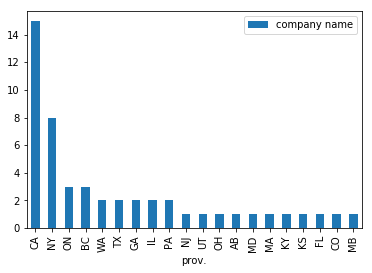

In [117]:
df1.plot.bar(x='prov.')

# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html

_Not surprising that CA + NY make up almost half of top 10% of high growth companies_

In [116]:
# What are the three companies in Ontario?

df_on = df[(df['rank'] < 51) & (df['prov.'] == 'ON')]
df_on

rank             company name                     primary industry  \
11      12  Prodigy Ventures Inc.                             Software   
22      23        StackAdapt Inc.                             Software   
31      32               Maropost  Digital content/media/entertainment   

    growth     city prov.              ceo name  rank  
11  128.00  Toronto    ON         Tom Beckerman    12  
22   79.87  Toronto    ON            Ildar Shar    23  
31   54.50  Toronto    ON  Ross Andrew Paquette    32

## Question 3 - Industry Analysis

In [118]:
import seaborn as sns

In [119]:
df.head()

rank                     company name              primary industry  \
0       1                    Donuts Inc.     Communications/networking   
1       2                 ClassPass Inc.                      Software   
2       3                          Toast                      Software   
3       4     Aratana Therapeutics, Inc.  Biotechnology/pharmaceutical   
4       5  Theravance Biopharma US, Inc.  Biotechnology/pharmaceutical   

   growth                 city prov.            ceo name  rank  
0  590.93             Kirkland    WA         Bruce Jaffe     1  
1  465.56             New York    NY        Fritz Lanman     2  
2  312.50               Boston    MA     Chris Comparato     3  
3  312.42              Leawood    KS    Steven St. Peter     4  
4  214.26  South San Francisco    CA  Rick E. Winningham     5

In [167]:
df_ind = df[['prov.', 'primary industry', 'company name']]

In [168]:
df_ind = df_ind.groupby(['prov.', 'primary industry']).count()
df_ind

company name
prov. primary industry                                 
AB    Software                                        2
AL    Software                                        1
AZ    Software                                        1
BC    Digital content/media/entertainment             3
      Electronic devices/hardware                     2
      Software                                       11
CA    Biotechnology/pharmaceutical                   31
      Communications/networking                       3
      Digital content/media/entertainment            14
      Electronic devices/hardware                     3
      Energy tech                                     2
      Medical devices                                10
      Semiconductor                                   5
      Software                                       80
CO    Biotechnology/pharmaceutical                    1
      Software                                        4
CT    Software                                        2
DC    Biotechnology/pharmaceutical                    1
      Digital content/media/entertainment             1
      Energy tech                                     1
      Software                                        3
DE    Biotechnology/pharmaceutical                    1
FL    Biotechnology/pharmaceutical                    2
      Communications/networking                       2
      Digital content/media/entertainment             1
      Electronic devices/hardware                     1
      Medical devices                                 2
      Software                                        6
GA    Biotechnology/pharmaceutical                    1
      Communications/networking                       1
...                                                 ...
PA    Biotechnology/pharmaceutical                    5
      Medical devices                                 1
      Software                                        6
QC    Digital content/media/entertainment             1
      Electronic devices/hardware                     2
      Software                                        5
SC    Software                                        1
SK    Software                                        2
TX    Biotechnology/pharmaceutical                    2
      Communications/networking                       1
      Digital content/media/entertainment             1
      Electronic devices/hardware                     1
      Medical devices                                 2
      Software                                       10
UT    Communications/networking                       1
      Digital content/media/entertainment             2
      Electronic devices/hardware                     1
      Software                                        8
VA    Biotechnology/pharmaceutical                    1
      Communications/networking                       3
      Digital content/media/entertainment             1
      Electronic devices/hardware                     1
      Software                                        4
WA    Biotechnology/pharmaceutical                    2
      Communications/networking                       1
      Digital content/media/entertainment             2
      Electronic devices/hardware                     1
      Medical devices                                 1
      Software                                       18
WI    Biotechnology/pharmaceutical                    1

[114 rows x 1 columns]

In [169]:
a = df_ind.reset_index()
result = a.pivot(index='prov.', columns='primary industry', values='company name')

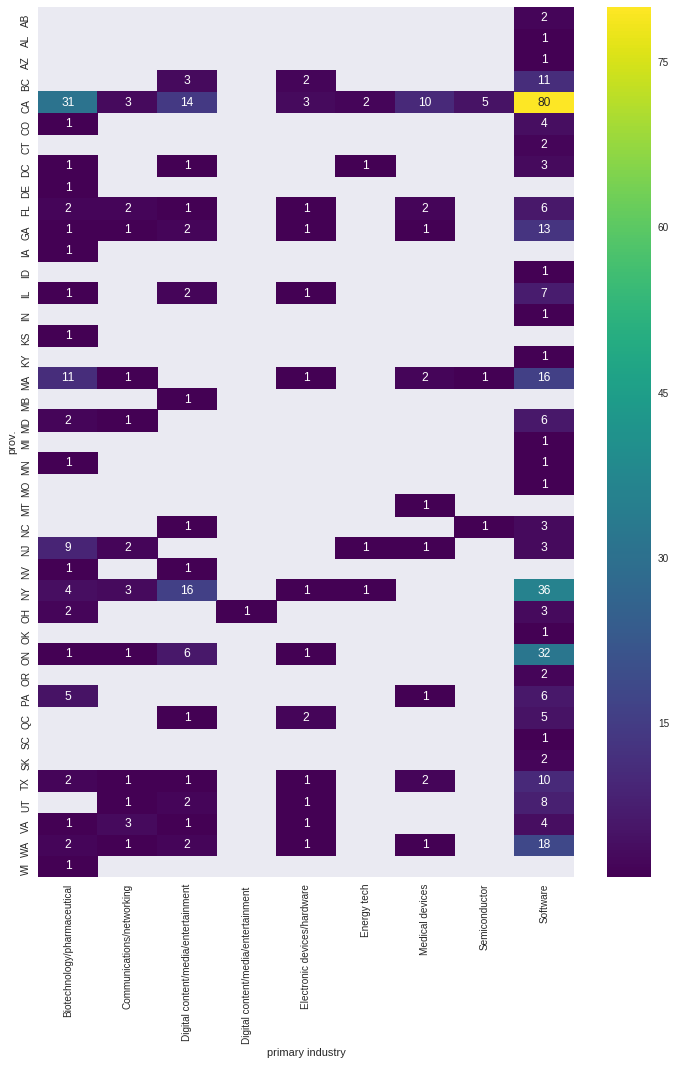

In [174]:
fig, ax = plt.subplots(figsize=(12,16)) 
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.show()

_Naturally, Software leads with CA leading the way with bio then media following up_